In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/1985-2022.csv',parse_dates=['Year'])
#data['year_month'] = pd.to_datetime(data['year_month'])
data['y'] = data['Year'].dt.year
data['m'] = data['Year'].dt.month
data['w'] = data['Year'].dt.week
data

C:\Users\Praveen Shahani\AppData\Local\Temp\ipykernel_23264\3163896816.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['w'] = data['Year'].dt.week


Year                                          Show_name  \
0     1985-09-06                                        42nd Street   
1     1985-09-06                                      A Chorus Line   
2     1985-09-06                                     Aren't We All?   
3     1985-09-06                                   Arms and the Man   
4     1985-09-06                                              As Is   
...          ...                                                ...   
47715 2022-08-05                           The Phantom of the Opera   
47716 2022-08-05                              The Skin of Our Teeth   
47717 2022-08-05                      Tina: The Tina Turner Musical   
47718 2022-08-05                                             Wicked   
47719 2022-08-05  for colored girls who have considered suicide/...   

       Potential_Gross  Difference  Average_ticket  Seats_Sold  \
0                  0.0        0.00           30.42        9281   
1                  0.0        0.00           27.25        8167   
2                  0.0        0.00           33.75        7386   
3                  0.0        0.00           20.87        4586   
4                  0.0        0.00           20.78        2938   
...                ...         ...             ...         ...   
47715         742308.2   117127.78           94.60        7847   
47716         174481.0    33370.00           52.81        3304   
47717        1065578.2   193232.80          122.56        8694   
47718        1341127.0   144364.00          119.06       11264   
47719         159092.9   -91081.60           65.71        2421   

       Seats_in_theater  Previews   %cap  diff_cap     y  m   w  
0                  1655         8  70.10      0.00  1985  9  36  
1                  1472         8  69.35      0.00  1985  9  36  
2                  1088         8  84.86      0.00  1985  9  36  
3                   682         8  84.05      0.00  1985  9  36  
4                   684         8  53.69      0.00  1985  9  36  
...                 ...       ...    ...       ...   ... ..  ..  
47715              1605         8  61.11      9.18  2022  8  31  
47716              1058         8  39.04     -8.27  2022  8  31  
47717              1478         8  73.53     14.13  2022  8  31  
47718              1807         8  77.92      4.53  2022  8  31  
47719               773         8  39.15    -11.77  2022  8  31  

[47720 rows x 13 columns]

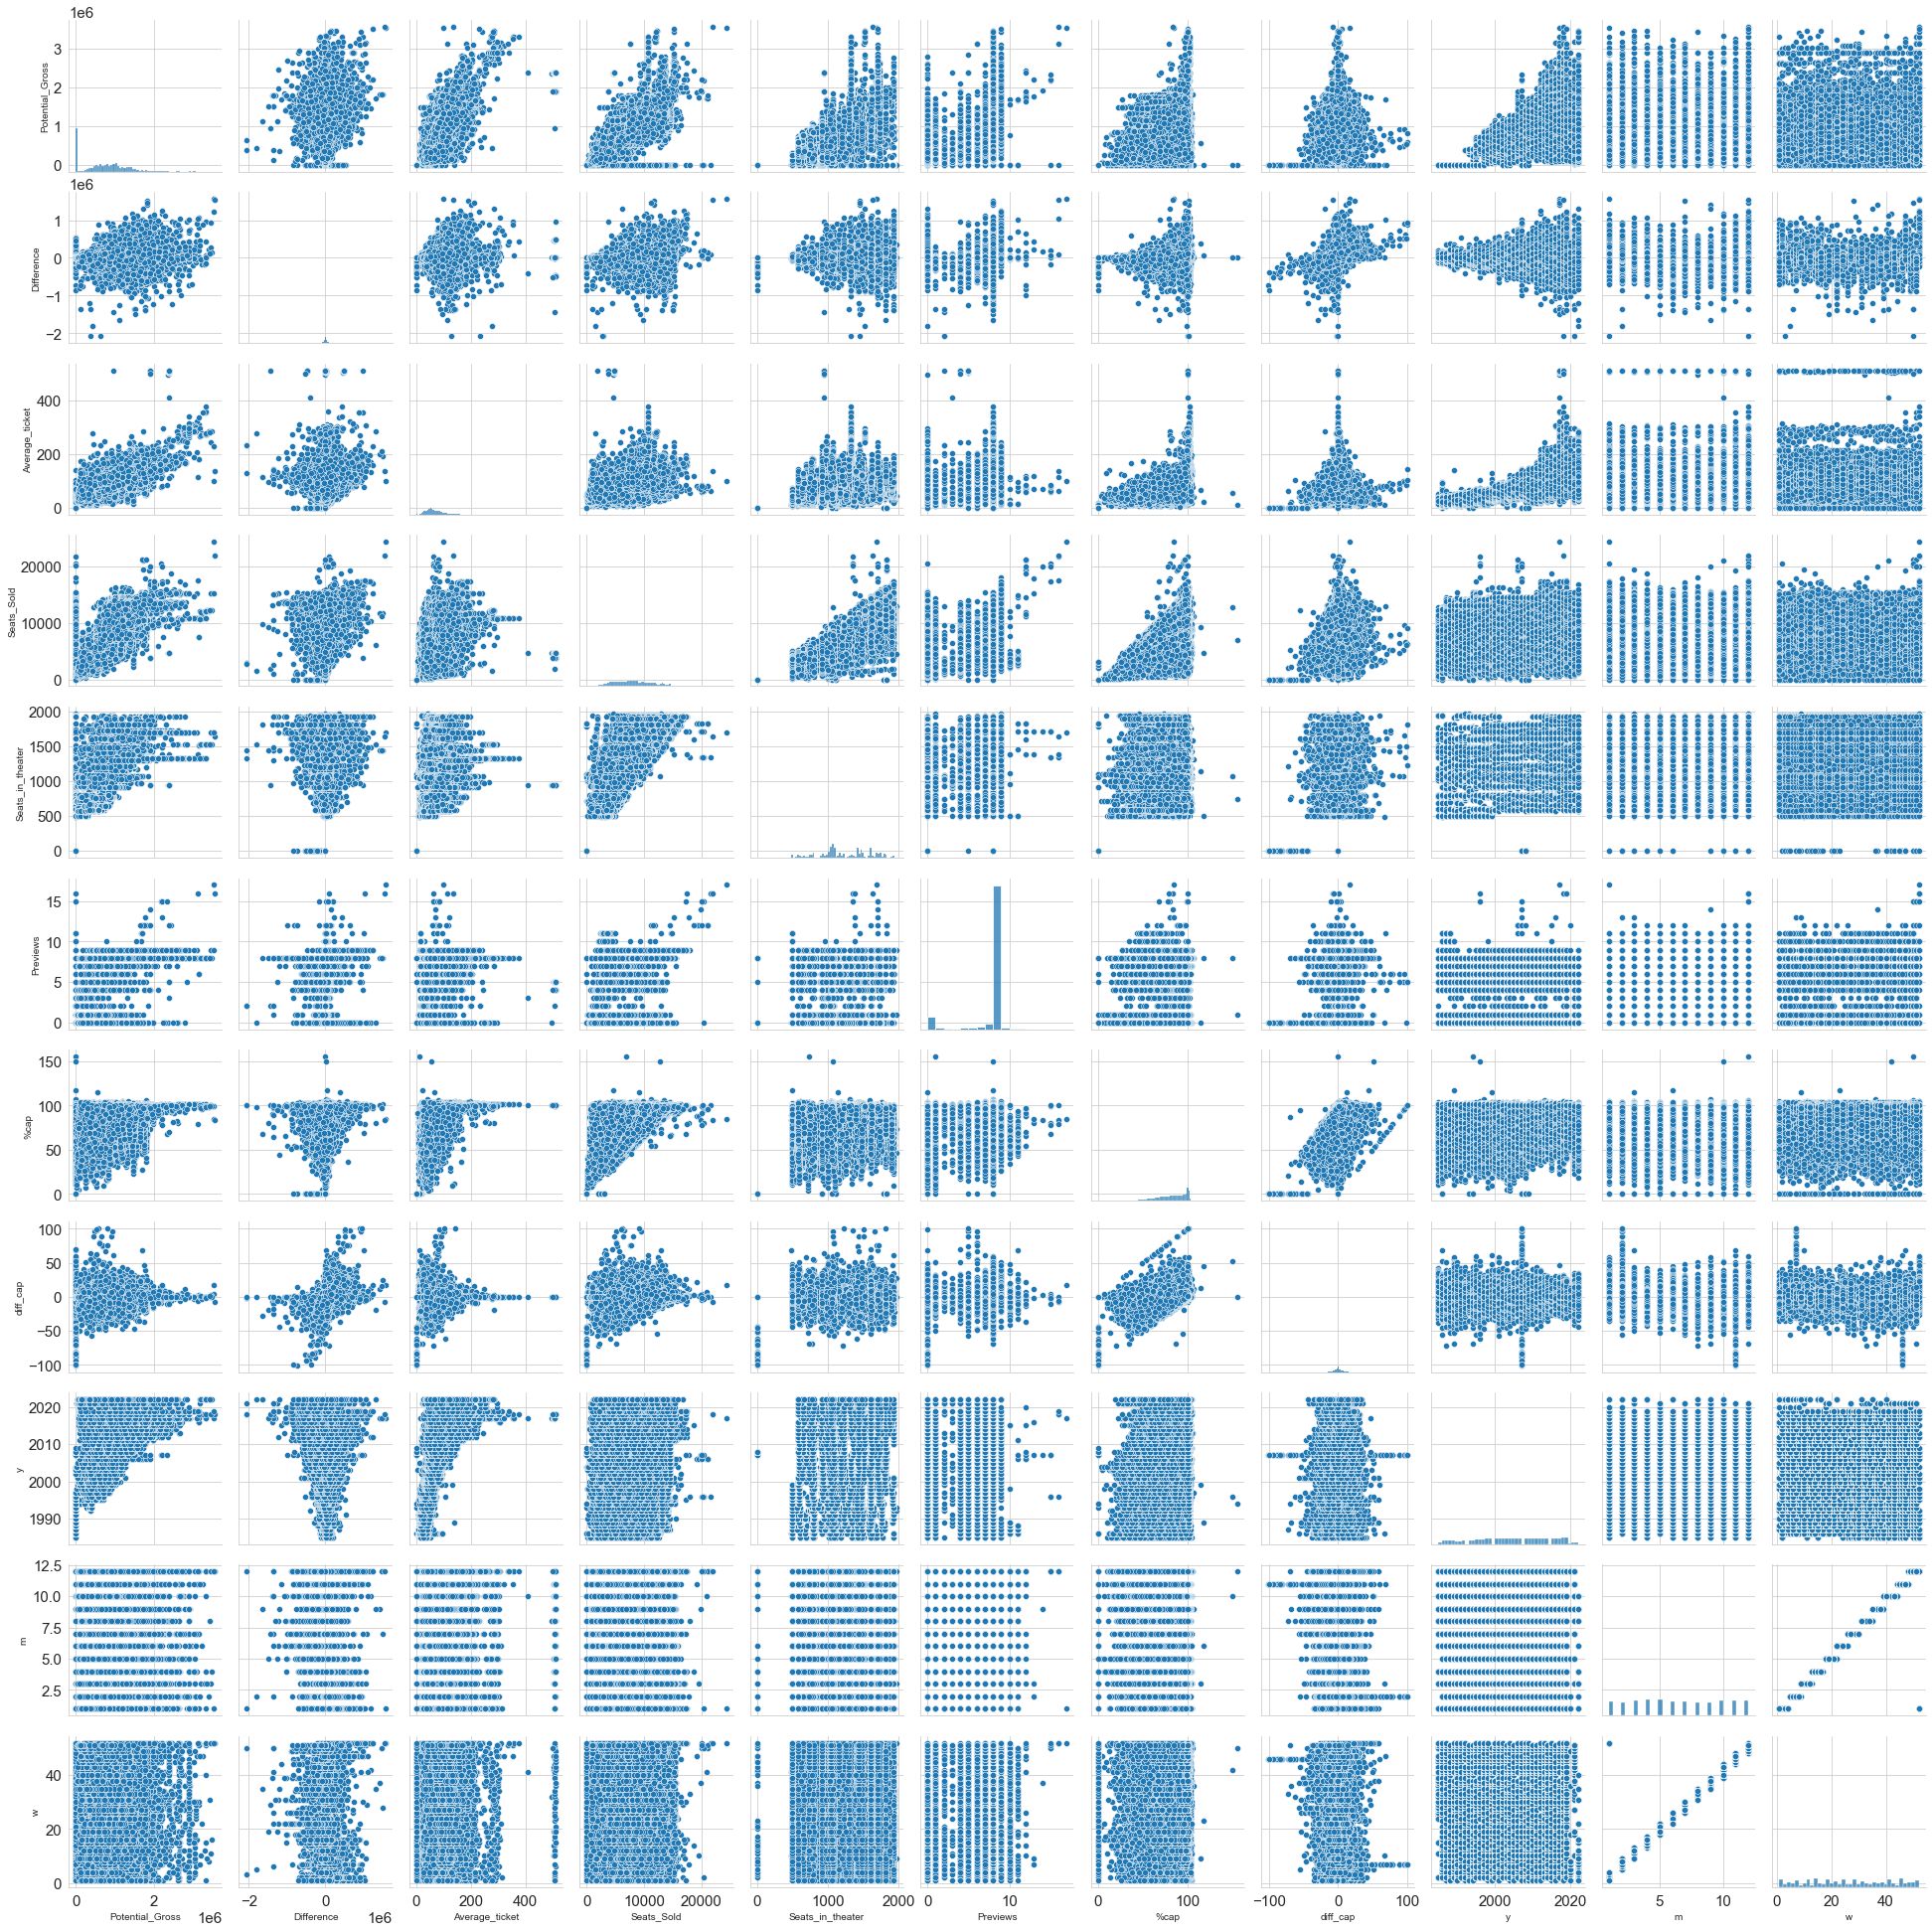

In [6]:
sns.pairplot(data)

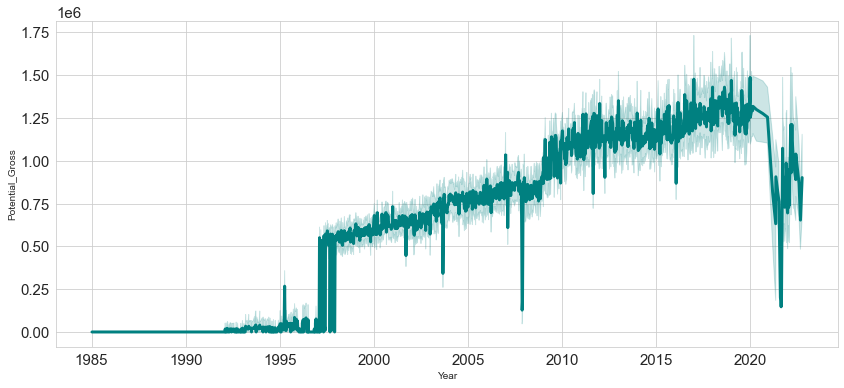

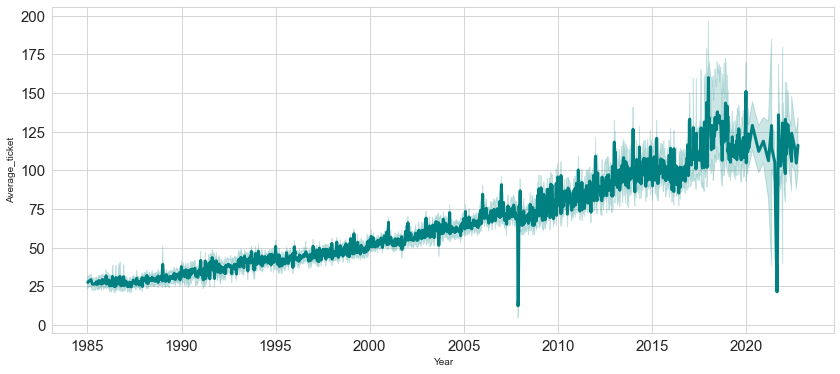

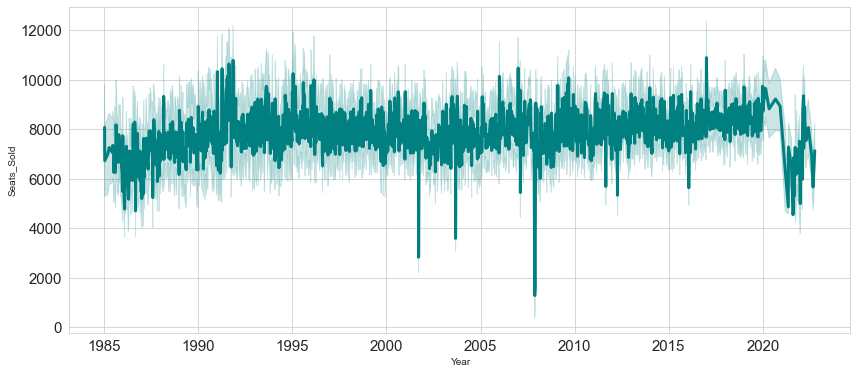

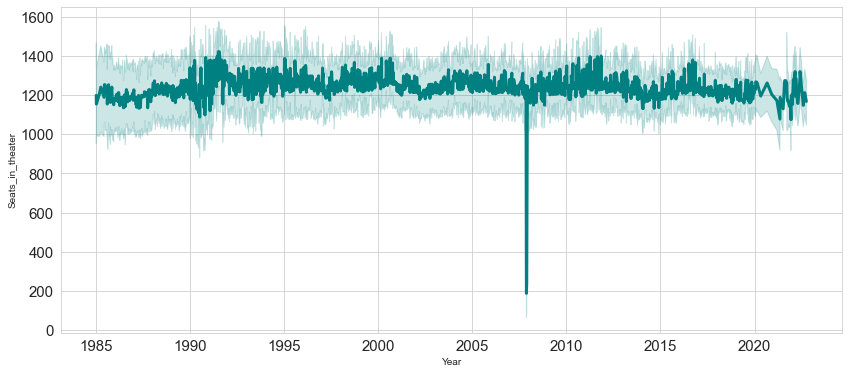

In [7]:
for i in ['Potential_Gross','Average_ticket','Seats_Sold','Seats_in_theater']:
    plt.figure(figsize=(14,6))
    #plt.title("India")
    sns.lineplot(x=data['Year'],y=data[i],color="teal",linewidth="3")

<AxesSubplot:xlabel='Year', ylabel='Potential_Gross'>

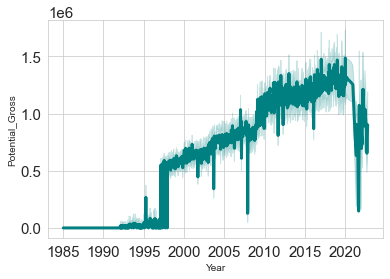

In [48]:
sns.lineplot(x=data['Year'],y=data['Potential_Gross'],color="teal",linewidth="3")
#plt.axvline(data['Potential_Gross'].min())

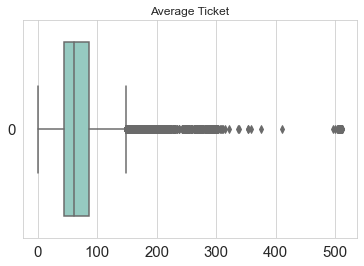

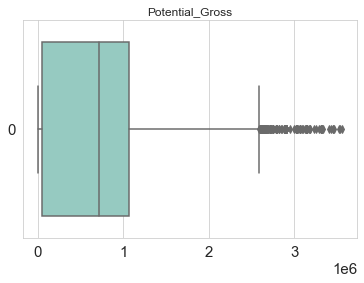

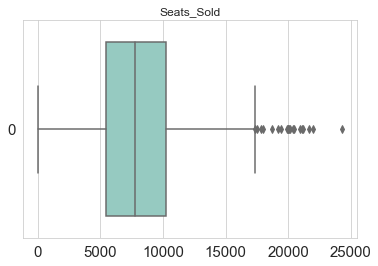

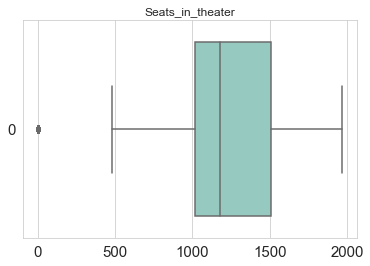

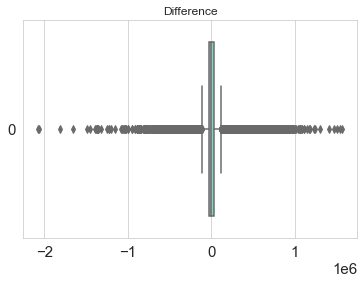

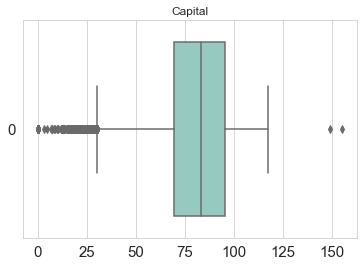

In [8]:
plt.figure(1)
sns.boxplot(data = data.loc[:, "Average_ticket"], orient = "h", palette = "Set3")
plt.title('Average Ticket')
plt.show()
plt.figure(2)
sns.boxplot(data = data.loc[:, "Potential_Gross"], orient = "h", palette = "Set3")
plt.title('Potential_Gross')
plt.show()
plt.figure(3)
sns.boxplot(data = data.loc[:, "Seats_Sold"], orient = "h", palette = "Set3")
plt.title('Seats_Sold')
plt.title('Seats_Sold')
plt.show()
plt.figure(3)
sns.boxplot(data = data.loc[:, "Seats_in_theater"], orient = "h", palette = "Set3")
plt.title('Seats_in_theater')
plt.show()
plt.figure(4)
sns.boxplot(data = data.loc[:, "Difference"], orient = "h", palette = "Set3")
plt.title('Difference')
plt.show()
plt.figure(5)
sns.boxplot(data = data.loc[:, "%cap"], orient = "h", palette = "Set3")
plt.title('Capital')
plt.show()

The Potential Gross increases every year

In [35]:
data_05_10 = data.loc[(data['y']>=2005) & (data['y'] <= 2010)]
#ata_15_20
#ata15

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

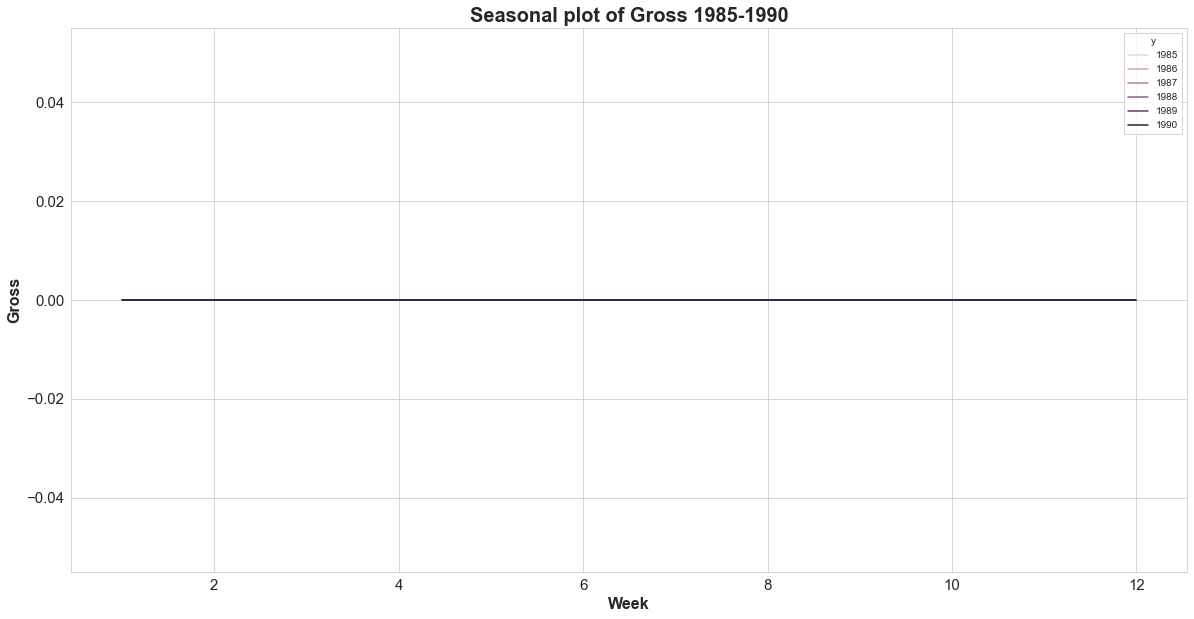

In [61]:
data_85_90 = data.loc[(data['y']>=1985) & (data['y']<=1990)]
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_85_90['m'], data_85_90['Potential_Gross'], hue=data_85_90['y'])
ax.set_title('Seasonal plot of Gross 1985-1990', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
#ax.legend('upper right')

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

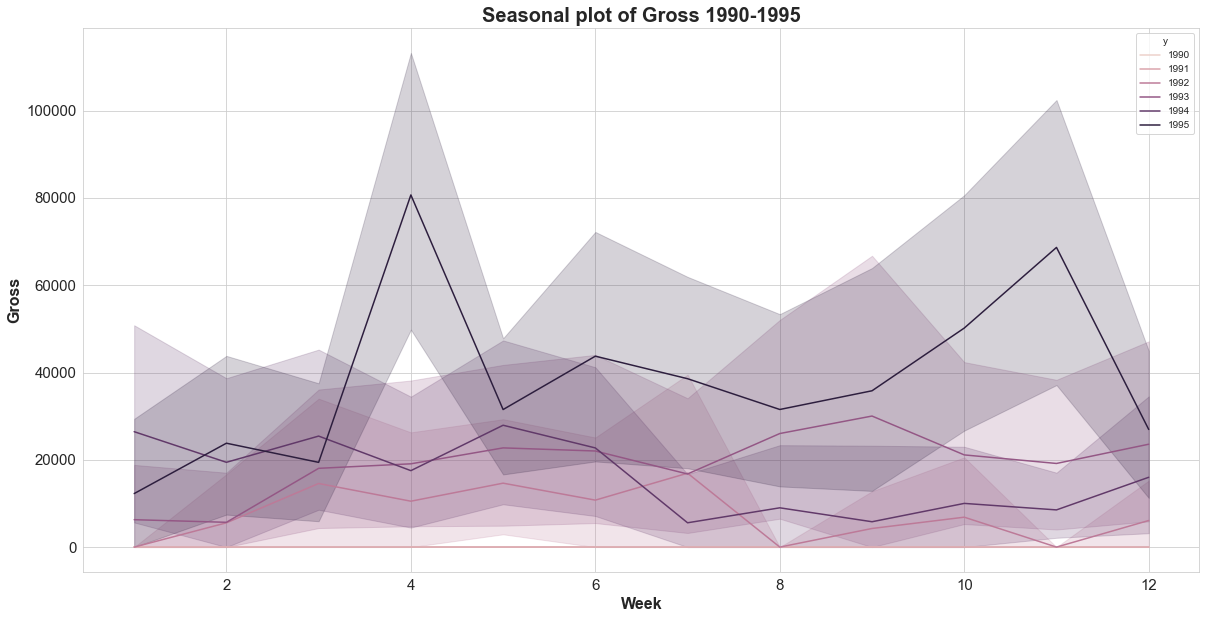

In [58]:
data_90_95 = data.loc[(data['y']>=1990) & (data['y']<=1995)]
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_90_95['m'], data_90_95['Potential_Gross'], hue=data_90_95['y'])
ax.set_title('Seasonal plot of Gross 1990-1995', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
#ax.legend('upper right')

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

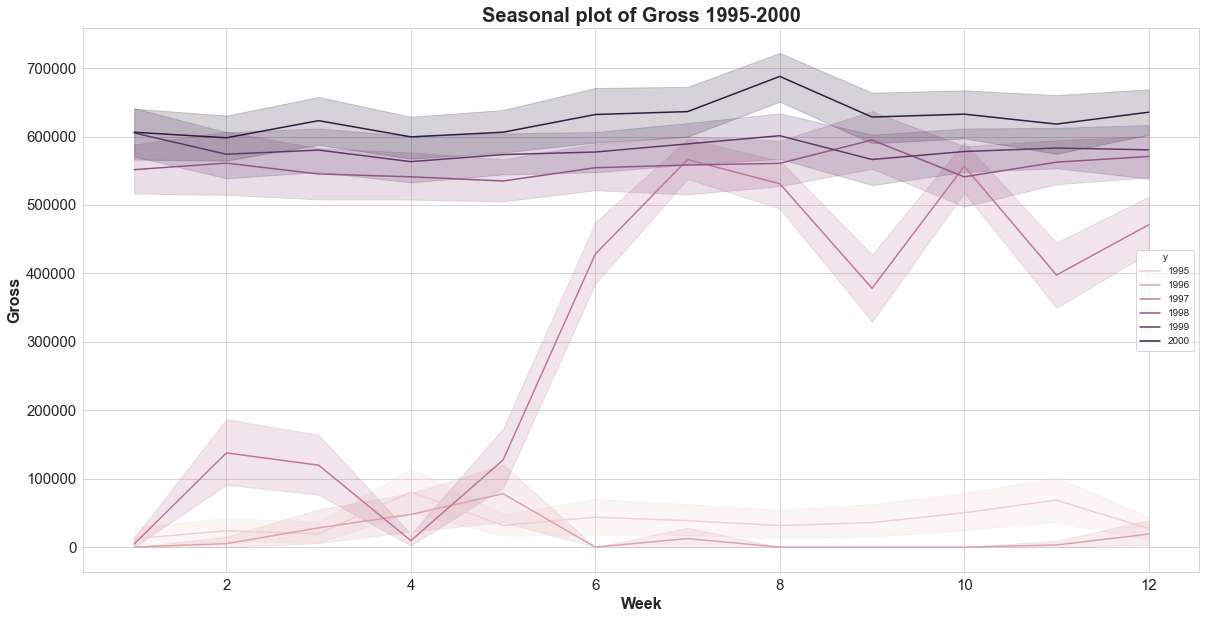

In [49]:
data_95_00 = data.loc[(data['y']>=1995) & (data['y']<=2000)]
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_95_00['m'], data_95_00['Potential_Gross'], hue=data_95_00['y'])
ax.set_title('Seasonal plot of Gross 1995-2000', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
#ax.legend('upper right')

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

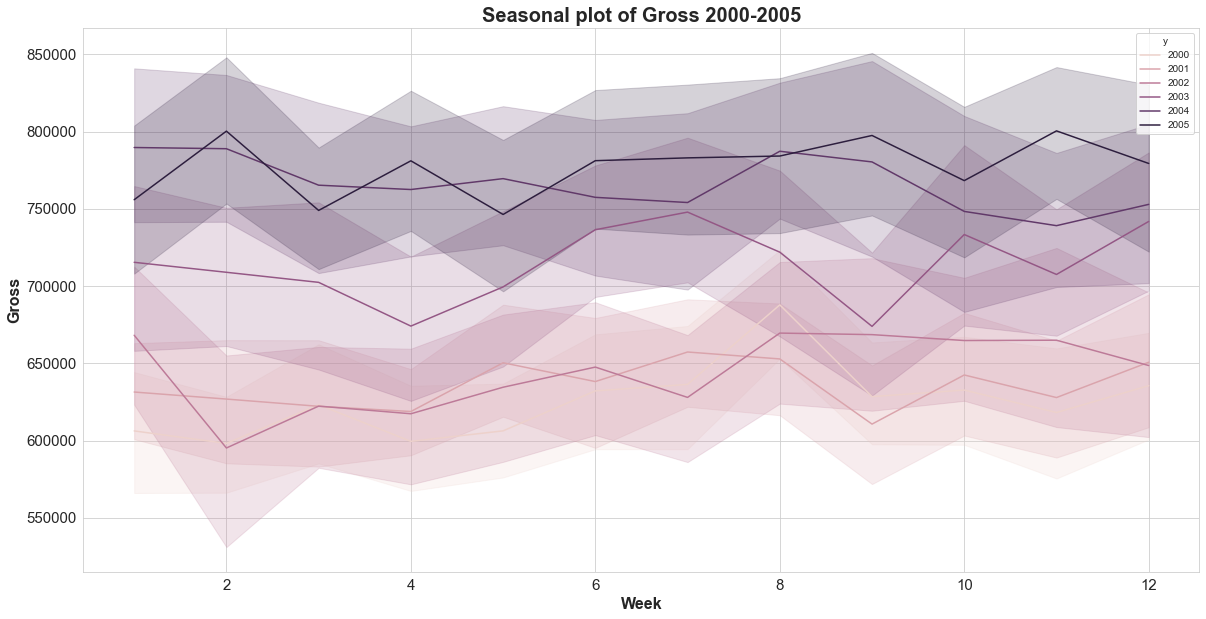

In [46]:
data_00_05 = data.loc[(data['y']>=2000) & (data['y']<=2005)]
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_00_05['m'], data_00_05['Potential_Gross'], hue=data_00_05['y'])
ax.set_title('Seasonal plot of Gross 2000-2005', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
#ax.legend('upper right')

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

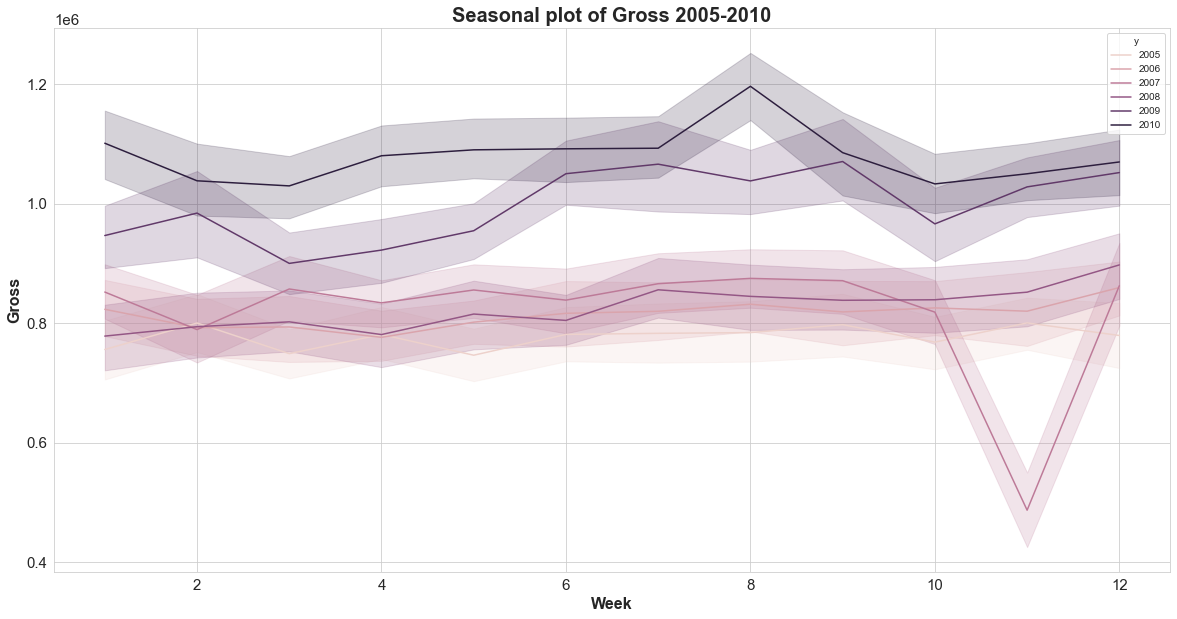

In [38]:
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_05_10['m'], data_05_10['Potential_Gross'], hue=data_05_10['y'])
ax.set_title('Seasonal plot of Gross 2005-2010', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))
#ax.legend('upper right')

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

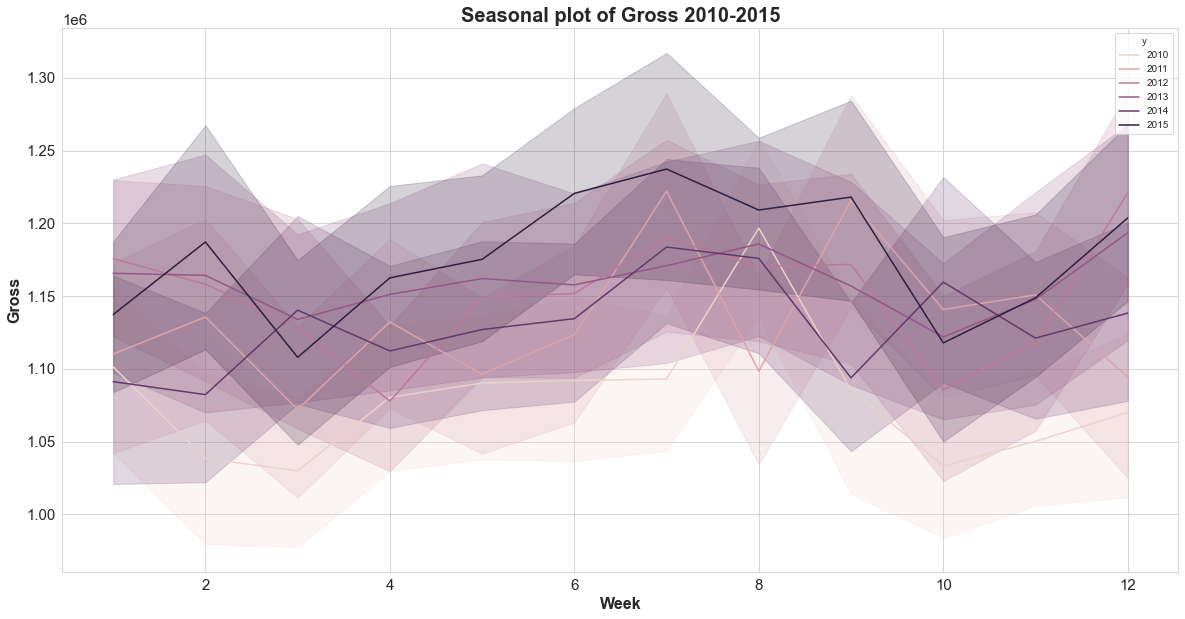

In [42]:
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_10_15['m'], data_10_15['Potential_Gross'], hue=data_10_15['y'])
ax.set_title('Seasonal plot of Gross 2010-2015', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

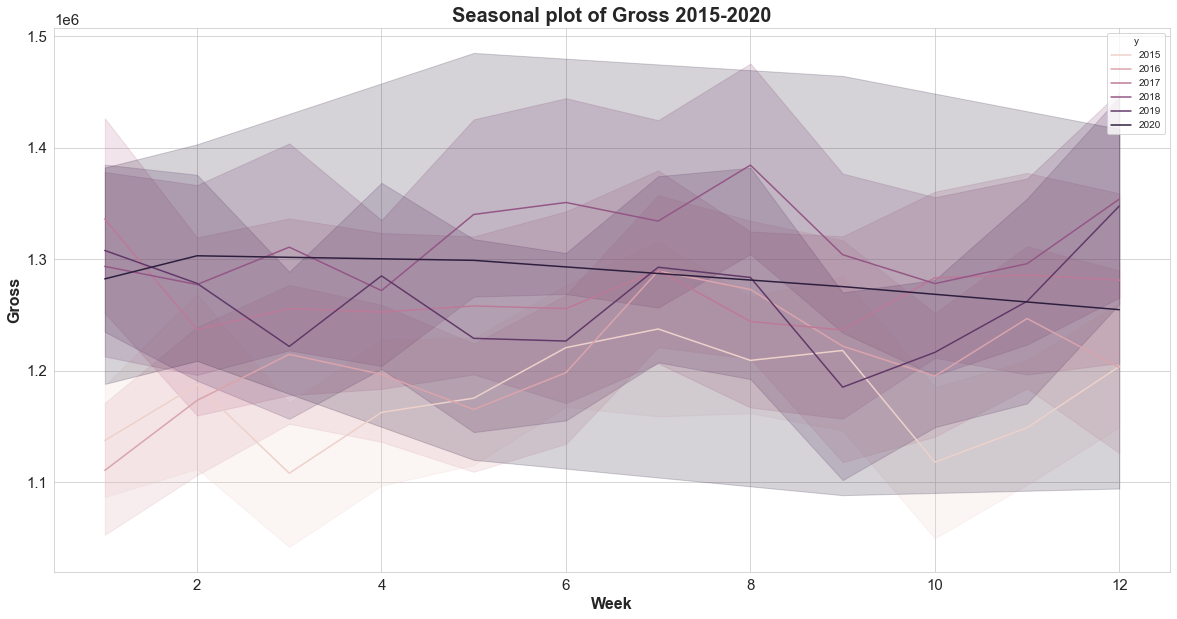

In [41]:
data_15_20 = data.loc[(data['y']>=2015) & (data['y']<=2020)]
#ata_15_20
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_15_20['m'], data_15_20['Potential_Gross'], hue=data_15_20['y'])
ax.set_title('Seasonal plot of Gross 2015-2020', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross')

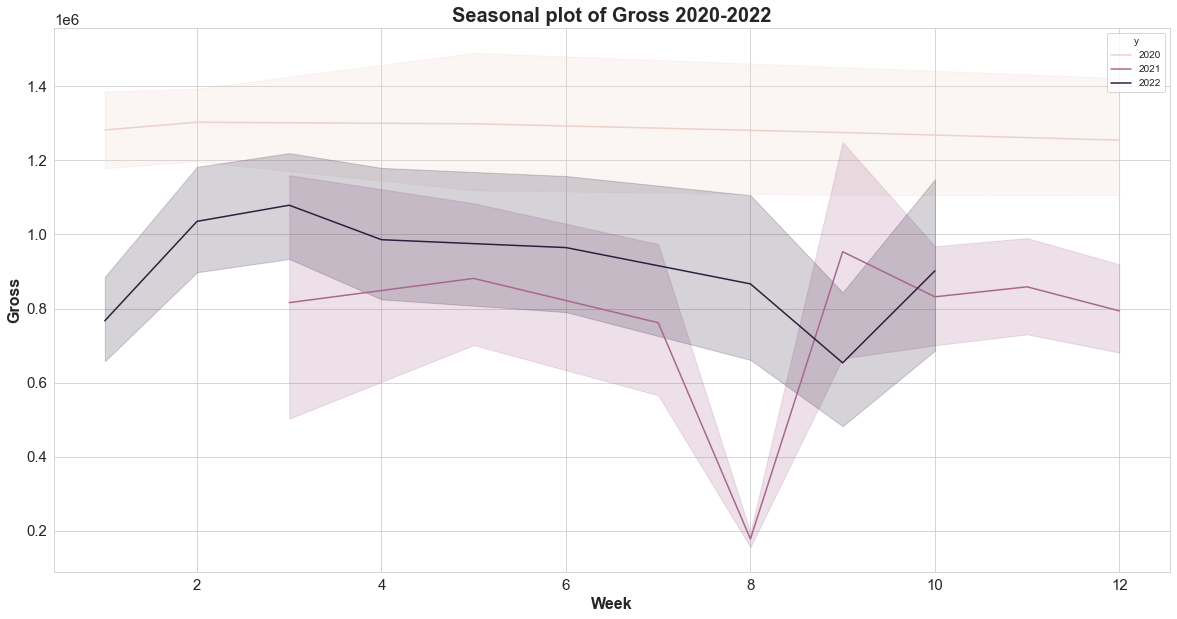

In [44]:
data_20_22 = data.loc[(data['y']>=2020) & (data['y']<=2022)]
#ata_15_20
variable = 'Potential_Gross'
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(data_20_22['m'], data_20_22['Potential_Gross'], hue=data_20_22['y'])
ax.set_title('Seasonal plot of Gross 2020-2022', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Gross', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Shape of passed values is (13, 3), indices imply (47720, 3)

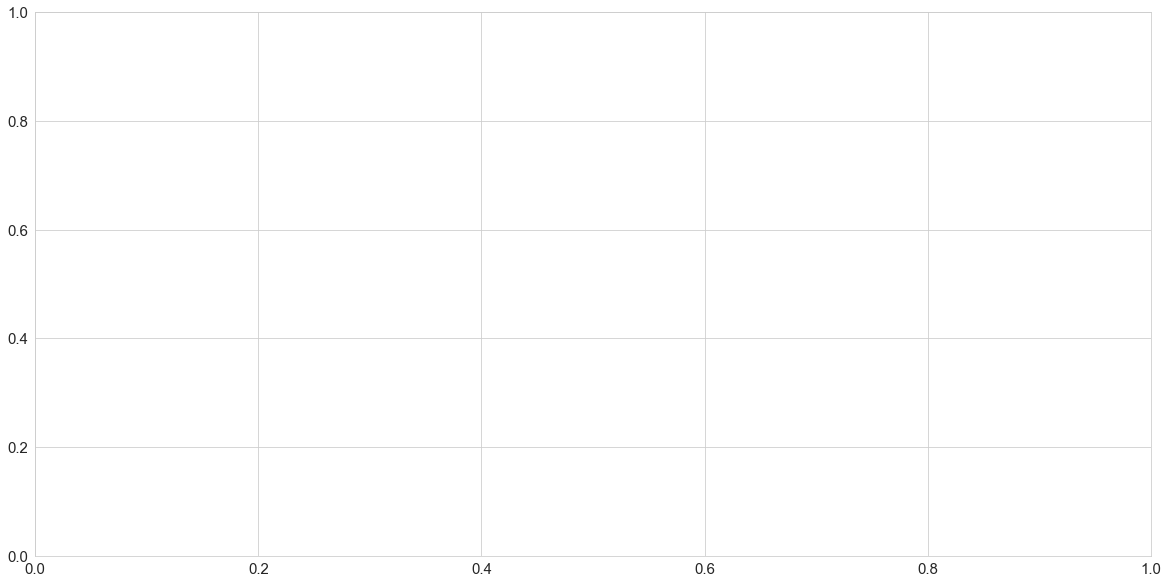

In [54]:
for i in [1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,
         2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]:
    fig, ax = plt.subplots(figsize=(20,10))
    palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
    sns.lineplot(data['m'], data['Potential_Gross'], hue=data[data['y']==i])

In [62]:
import plotly.express as px
fig = px.line_polar(data[data], r="m", theta="Potential_Gross", color="y", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()